# Data Manipulation with pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


with open('data/avoplotto.pkl', 'rb') as f:
    avocados = pickle.load(f)

homelessness = pd.read_csv('data/homelessness.csv')
sales = pd.read_csv('data/sales_subset.csv')
temperatures = pd.read_csv('data/temperatures.csv')

## Transforming DataFrames

### Introduction DataFrames

In [2]:
# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

[[0 'East South Central' 'Alabama' 2570.0 864.0 4887681]
 [1 'Pacific' 'Alaska' 1434.0 582.0 735139]
 [2 'Mountain' 'Arizona' 7259.0 2606.0 7158024]
 [3 'West South Central' 'Arkansas' 2280.0 432.0 3009733]
 [4 'Pacific' 'California' 109008.0 20964.0 39461588]
 [5 'Mountain' 'Colorado' 7607.0 3250.0 5691287]
 [6 'New England' 'Connecticut' 2280.0 1696.0 3571520]
 [7 'South Atlantic' 'Delaware' 708.0 374.0 965479]
 [8 'South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 [9 'South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 [10 'South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 [11 'Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 [12 'Mountain' 'Idaho' 1297.0 715.0 1750536]
 [13 'East North Central' 'Illinois' 6752.0 3891.0 12723071]
 [14 'East North Central' 'Indiana' 3776.0 1482.0 6695497]
 [15 'West North Central' 'Iowa' 1711.0 1038.0 3148618]
 [16 'West North Central' 'Kansas' 1443.0 773.0 2911359]
 [17 'East South Central' 'Kentucky' 2735.0 953.0 4461153]
 [18 'West South Cen

### Sorting and Subsetting

In [3]:
# Sort homelessness by individuals
homelessness_ind = homelessness.sort_values(by='individuals')

# Print the top few rows
homelessness_ind.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
50,50,Mountain,Wyoming,434.0,205.0,577601
34,34,West North Central,North Dakota,467.0,75.0,758080
7,7,South Atlantic,Delaware,708.0,374.0,965479
39,39,New England,Rhode Island,747.0,354.0,1058287
45,45,New England,Vermont,780.0,511.0,624358


In [4]:
homelessness_ind.sort_values(["individuals", "family_members"], ascending=[True, False])
homelessness_ind.head(5)

,Unnamed: 0,region,state,individuals,family_members,state_pop
50,50,Mountain,Wyoming,434.0,205.0,577601
34,34,West North Central,North Dakota,467.0,75.0,758080
7,7,South Atlantic,Delaware,708.0,374.0,965479
39,39,New England,Rhode Island,747.0,354.0,1058287
45,45,New England,Vermont,780.0,511.0,624358


In [5]:
# Select the individuals column
individuals = homelessness['individuals']

# Print the head of the result
individuals.head()

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64

In [6]:
ind_gt_10k = homelessness[homelessness['individuals'] > 10000]

# See the result
print(ind_gt_10k)

    Unnamed: 0              region       state  individuals  family_members  \
4            4             Pacific  California     109008.0         20964.0   
9            9      South Atlantic     Florida      21443.0          9587.0   
32          32        Mid-Atlantic    New York      39827.0         52070.0   
37          37             Pacific      Oregon      11139.0          3337.0   
43          43  West South Central       Texas      19199.0          6111.0   
47          47             Pacific  Washington      16424.0          5880.0   

    state_pop  
4    39461588  
9    21244317  
32   19530351  
37    4181886  
43   28628666  
47    7523869  


In [7]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness['region'] == 'South Atlantic') | (homelessness['region'] == 'Mid-Atlantic')]

# See the result
print(south_mid_atlantic)

    Unnamed: 0          region                 state  individuals  \
7            7  South Atlantic              Delaware        708.0   
8            8  South Atlantic  District of Columbia       3770.0   
9            9  South Atlantic               Florida      21443.0   
10          10  South Atlantic               Georgia       6943.0   
20          20  South Atlantic              Maryland       4914.0   
30          30    Mid-Atlantic            New Jersey       6048.0   
32          32    Mid-Atlantic              New York      39827.0   
33          33  South Atlantic        North Carolina       6451.0   
38          38    Mid-Atlantic          Pennsylvania       8163.0   
40          40  South Atlantic        South Carolina       3082.0   
46          46  South Atlantic              Virginia       3928.0   
48          48  South Atlantic         West Virginia       1021.0   

    family_members  state_pop  
7            374.0     965479  
8           3134.0     701547  
9     

### New Columns

In [8]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_individuals col as proportion of total that are individuals
homelessness['p_individuals'] = homelessness['individuals'] / homelessness['total']

# See the result
homelessness.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop,total,p_individuals
0,0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


## Aggregating DataFrames

### Summary Statistics

In [9]:
# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())

23843.950148505668
12049.064999999999
2012-10-26
2010-02-05


In [10]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

16.583333333333336


In [11]:
# Sort sales_1_1 by date
sales_1_1 = sales.sort_values(by='date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

             date  weekly_sales  cum_weekly_sales  cum_max_sales
0      2010-02-05      24924.50      2.492450e+04       24924.50
6437   2010-02-05      38597.52      6.352202e+04       38597.52
1249   2010-02-05       3840.21      6.736223e+04       38597.52
6449   2010-02-05      17590.59      8.495282e+04       38597.52
6461   2010-02-05       4929.87      8.988269e+04       38597.52
...           ...           ...               ...            ...
3592   2012-10-05        440.00      2.568932e+08      293966.05
8108   2012-10-05        660.00      2.568938e+08      293966.05
10773  2012-10-05        915.00      2.568947e+08      293966.05
6257   2012-10-12          3.00      2.568947e+08      293966.05
3384   2012-10-26        -21.63      2.568947e+08      293966.05

[10774 rows x 4 columns]


### Counting

In [12]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store', 'type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store', 'department'])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset='date')

# Print date col of holiday_dates
print(holiday_dates['date'])

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
901          901      2    A           1  2010-02-05      35034.06   
1798        1798      4    A           1  2010-02-05      38724.42   
2699        2699      6    A           1  2010-02-05      25619.00   
3593        3593     10    B           1  2010-02-05      40212.84   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0          False       5.727778              0.679451         8.106  
901        False       4.550000              0.679451         8.324  
1798       False       6.533333              0.686319         8.623  
2699       False       4.683333              0.679451         7.259  
3593       False      12.411111              0.782478         9.765  
    Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0            0      1    A           1  2010-02-05      24924.50       False   

### Grouped Summary Statistics

In [13]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [14]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [15]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([min, max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([min, max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         min        max          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


### Pivot Tables

In [16]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values='weekly_sales', index='type')

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [17]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values='weekly_sales', index='department', columns='type', fill_value=0))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]


## Slicing and Indexing DataFrames

### Explicit Indexes 

In [18]:
# Look at temperatures
print(temperatures)

# Set the index of temperatures to city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(temperatures_ind)

# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...         ...      ...            ...         ...
16495       16495  2013-05-01     Xian          China      18.979
16496       16496  2013-06-01     Xian          China      23.522
16497       16497  2013-07-01     Xian          China      25.251
16498       16498  2013-08-01     Xian          China      24.528
16499       16499  2013-09-01     Xian          China         NaN

[16500 rows x 5 columns]
         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidj

In [19]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures['city'].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
...           ...         ...               ...     ...         ...
13360       13360  2013-05-01  Saint Petersburg  Russia      12.355
13361       13361  2013-06-01  Saint Petersburg  Russia      17.185
13362       13362  2013-07-01  Saint Petersburg  Russia      17.234
13363       13363  2013-08-01  Saint Petersburg  Russia      17.153
13364       13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 5 columns]
                  Unnamed: 0        date country  avg_temp_c
city                                                        
Moscow                 10725  2000-01-

In [20]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country', 'city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [('Brazil', 'Rio De Janeiro'), ('Pakistan', 'Lahore')]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


### Slicing and Subsetting with .loc and .iloc

In [21]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan", "Lahore"):("Russia", "Moscow")])

                           Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
...                               ...         ...         ...
Russia   Saint Petersburg       13360  2013-05-01      12.355
         Saint Petersburg       13361  2013-06-01      17.185
         Saint Petersburg       13362  2013-07-01      17.234
         Saint Petersburg       13363  2013-08-01      17.153
         Saint Petersburg       13364  2013-09-01         NaN

[1155 rows x 3 columns]
                    Unnamed: 0        date  avg_temp_c
country city                                          
Mexico  Mexico           10230  2000-01-01      12.694
    

### Working with Pivot Tables

In [22]:
# # Add a year column to temperatures
# temperatures['year'] = temperatures['date'].dt.year

# # Pivot avg_temp_c by country and city vs year
# temp_by_country_city_vs_year = temperatures.pivot_table('avg_temp_c', index=['country', 'city'], columns='year')

# # See the result
# print(temp_by_country_city_vs_year)

## Creating and Visualizing DataFrames

### Visualizing your data

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


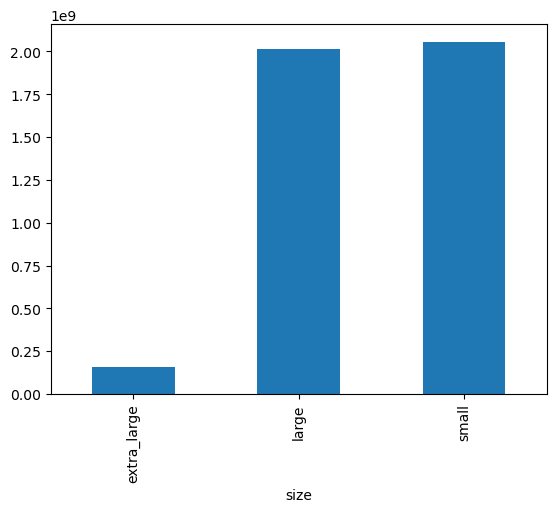

In [23]:
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

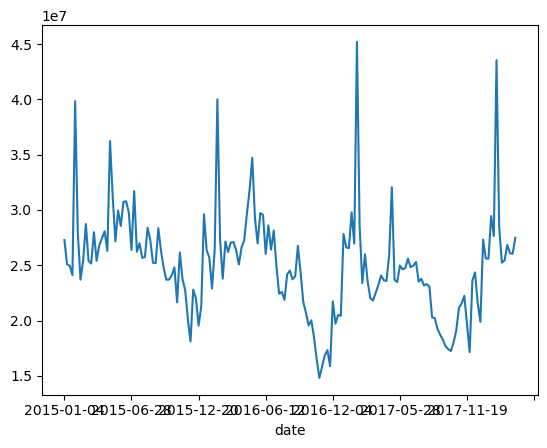

In [24]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(x='date', y='nb_sold', kind='line')

# Show the plot
plt.show()

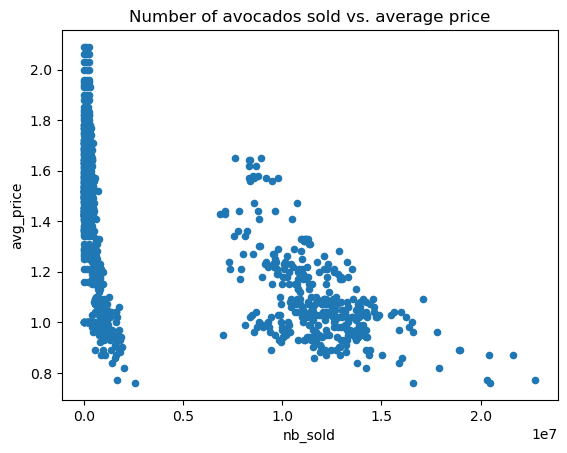

In [25]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

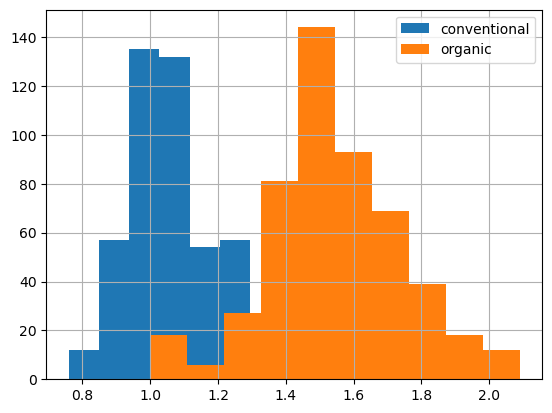

In [26]:
# Histogram of conventional avg_price 
avocados[avocados['type'] == 'conventional']['avg_price'].hist()

# Histogram of organic avg_price
avocados[avocados['type'] == 'organic']['avg_price'].hist()

# Add a legend
plt.legend(['conventional', 'organic'])

# Show the plot
plt.show()

### Missing values

       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[1014 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


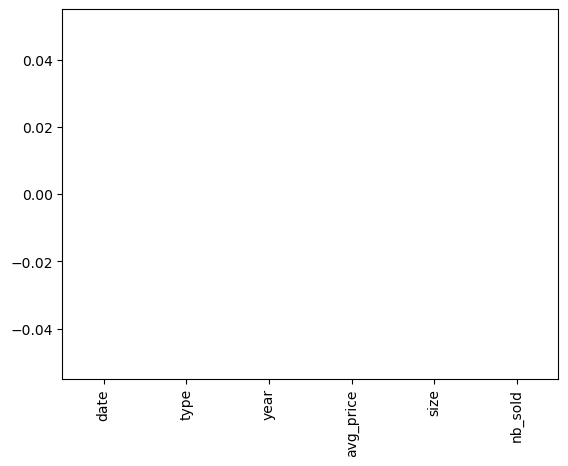

In [29]:
# Check individual values for missing values
print(avocados.isna())

# Check each column for missing values
print(avocados.isna().any())

# Bar plot of missing values by variable
avocados.isna().sum().plot(kind='bar')

# Show plot
plt.show()

In [30]:
# Remove rows with missing values
avocados_complete = avocados.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


### Creating DataFrames

### Reading and writing CSVs